# Use Cases

In this notebook we will walk you through $k$-Motiflets unique ability to learn its parameters from the data to discover meaningful motif sets.

# Load required Libraries

### Use Pyattimo

In [1]:
!pip install pyattimo --upgrade

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

from motiflets.motiflets import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# Dataset: ECG heartbeats from the LTAF database


The ECG heartbeats datasets contains a patient's (with ID $71$) heartbeat from the LTAF database. It consists of $3.000$ measurements at $128Hz$ corresponding to roughly $~23s$. The heartbeat rate is around $60$ to $80$ bpm. The TS contains two motifs. It starts with $6$ repetitions of a calibration signal, followed by roughly $16$ full heartbeats.

### References
- [1] https://academic.oup.com/europace/article/9/7/466/553888

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


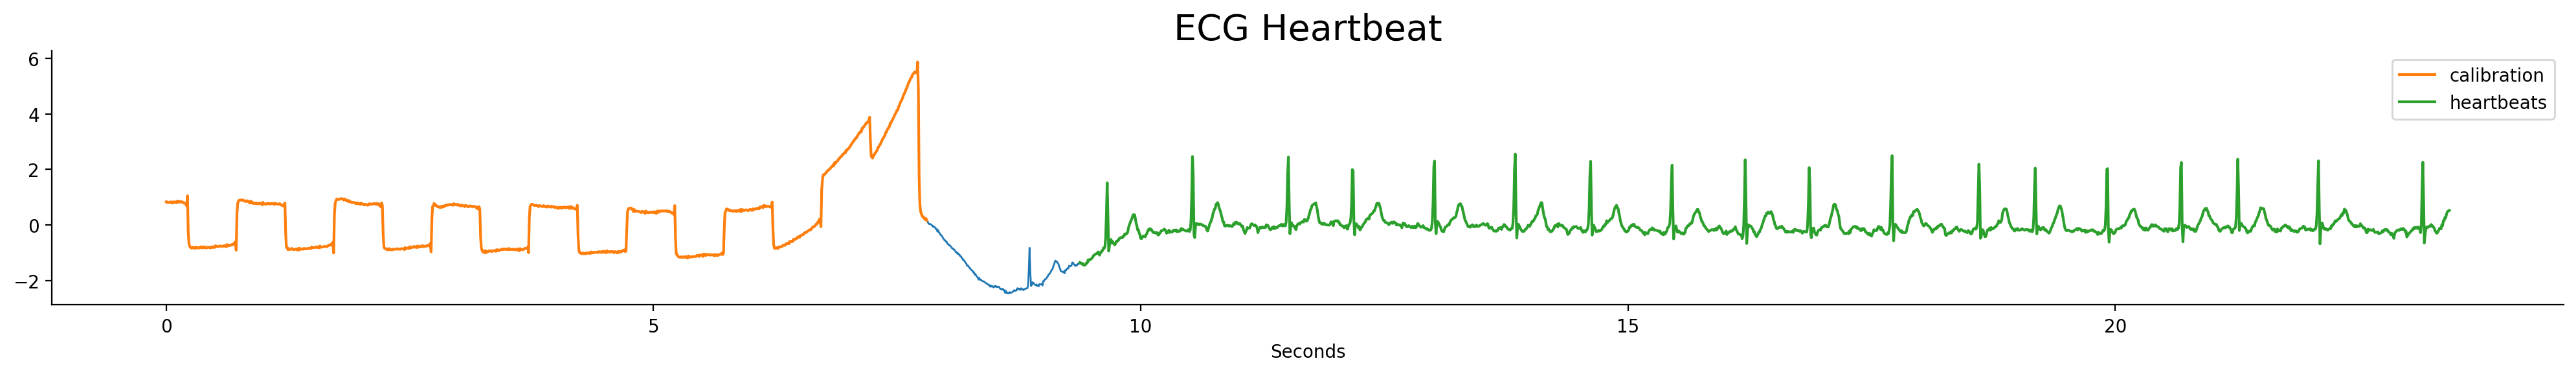

In [3]:
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = read_dataset_with_index(file) 

ml = Motiflets(ds_name, series, df_gt)
fig, ax = ml.plot_dataset()

# Known Motifs

There are two motifs: A calibration signal with $6$ repetitions, and the actual heartbeats with around $16$ occurrences.

## First, we learn the motif length l

We find aminimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

	Time 25.8 s


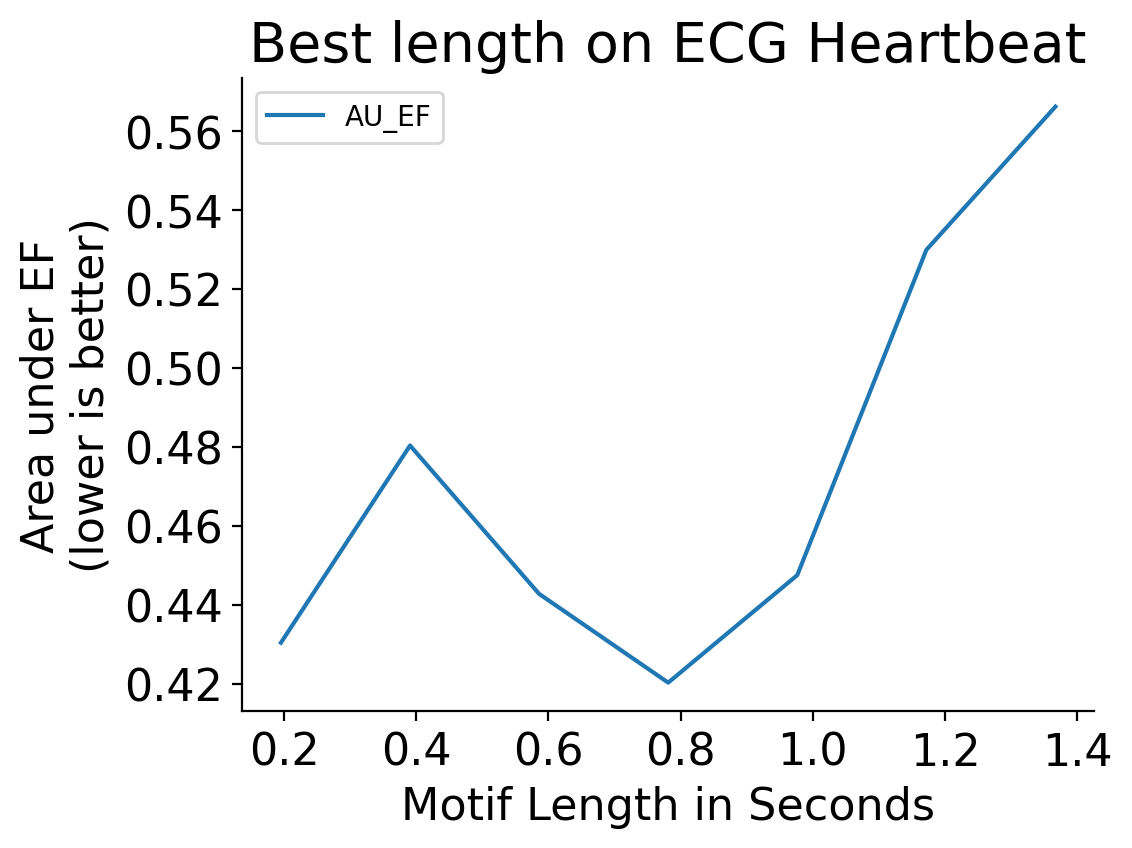

Best motif length 0.78125 seconds


In [4]:
ks = 20
length_range = np.arange(25,200,25) 
motif_length = ml.fit_motif_length(ks, length_range)
print ("Best motif length", series.index[motif_length], "seconds")

## Next, we learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

Data 3000
Chosen window-size: 100 in 3.9 s
Elbow Points [ 6 16]


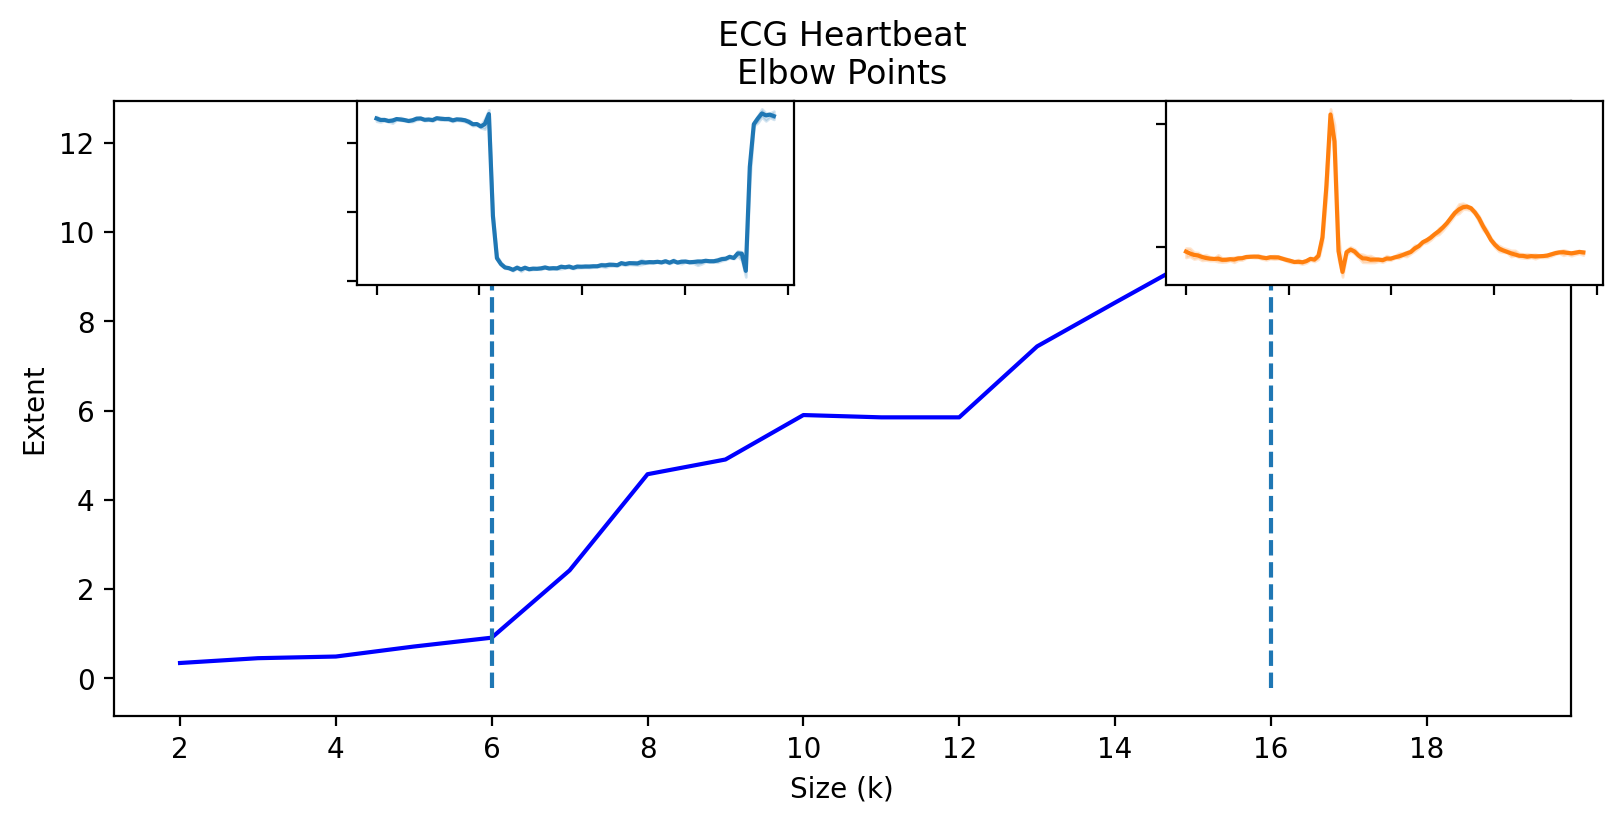

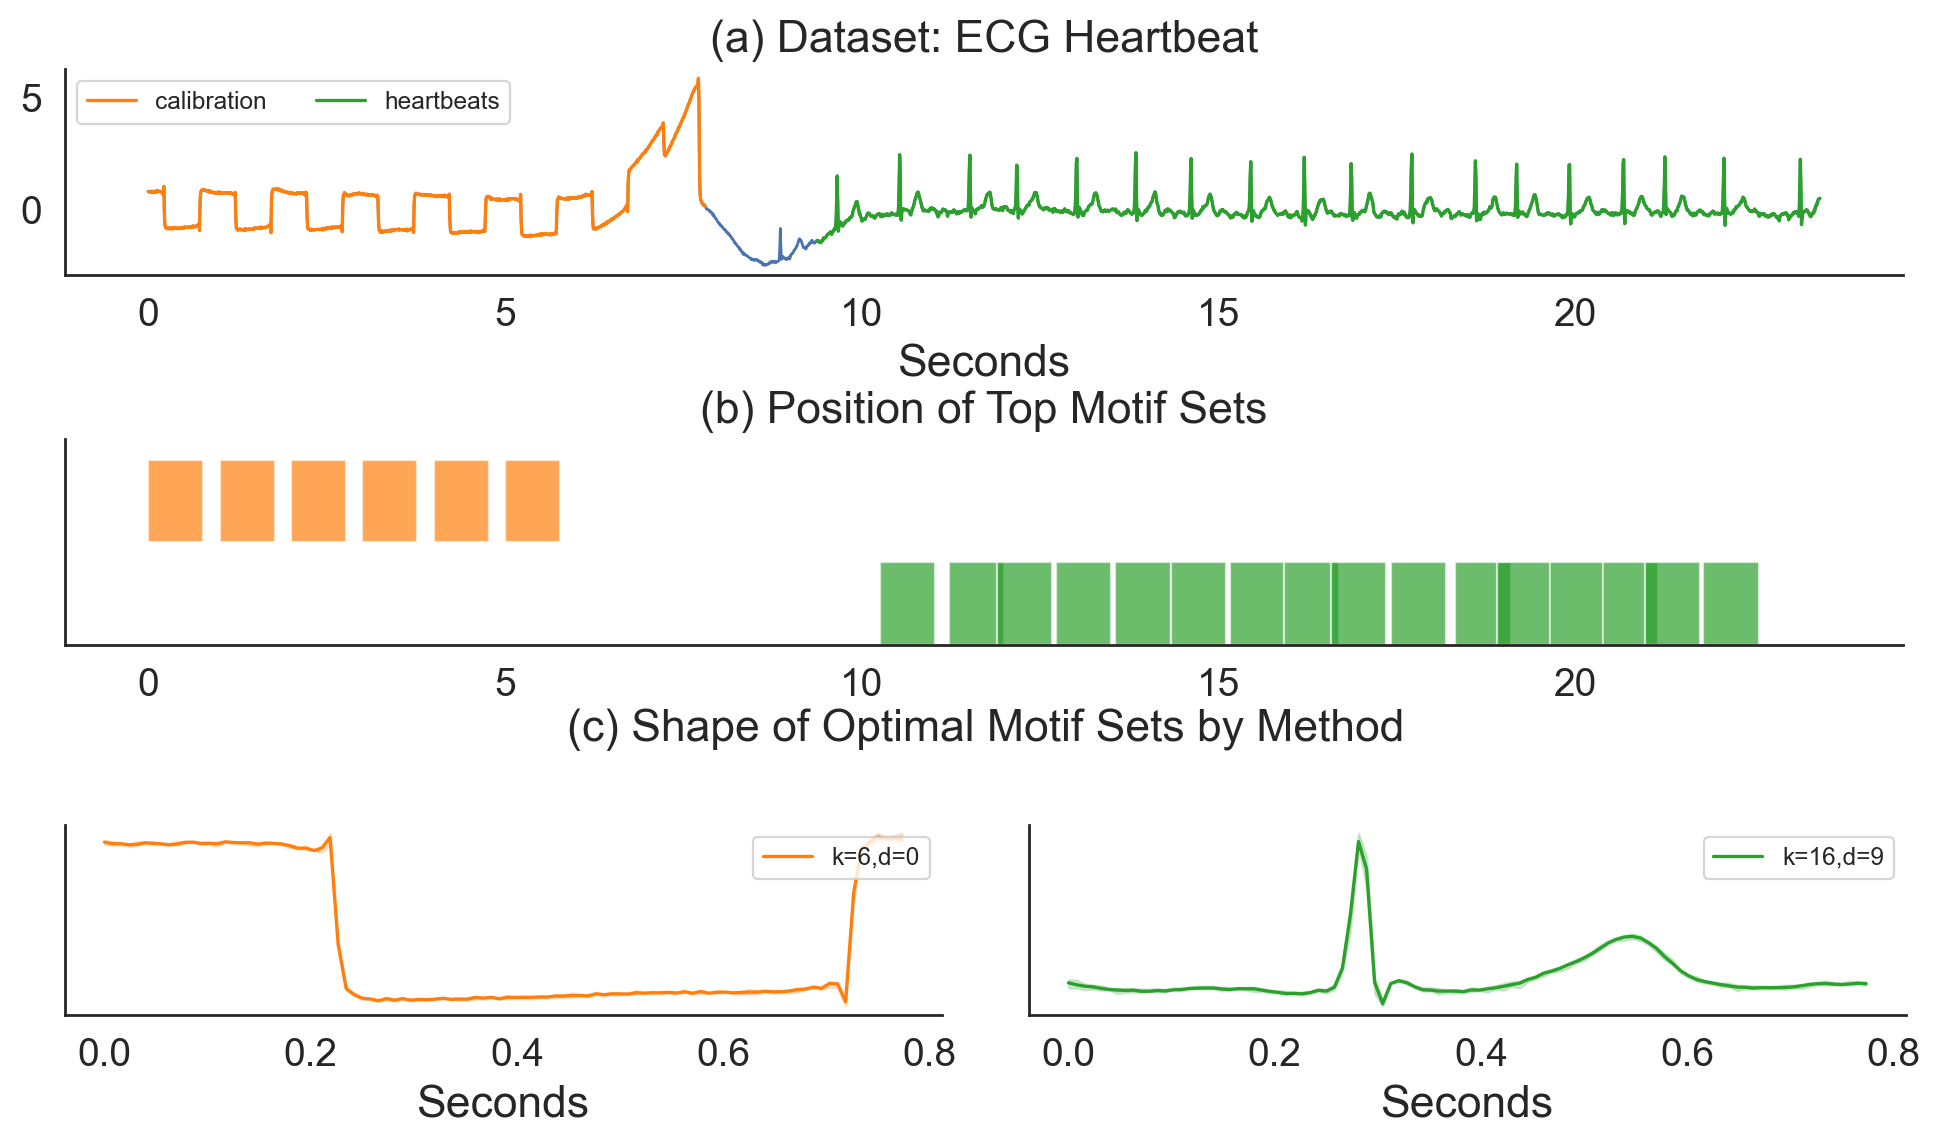

In [5]:
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length)

<hr>

# Dataset: Muscle Activation Dataset

The Muscle Activation dataset was collected from professional in-line speed skating on a large motor driven treadmill with Electromyography (EMG) data of multiple movements. It consists of $29.899$ measurements at $100Hz$ corresponding to $30s$ in total. The known motifs are the muscle movement and a recovery phase.

### References
- [1] https://link.springer.com/content/pdf/10.1007/s10618-007-0070-1.pdf
- [2] http://www.cs.ucr.edu/~eamonn/iSAX/iSAX.html

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


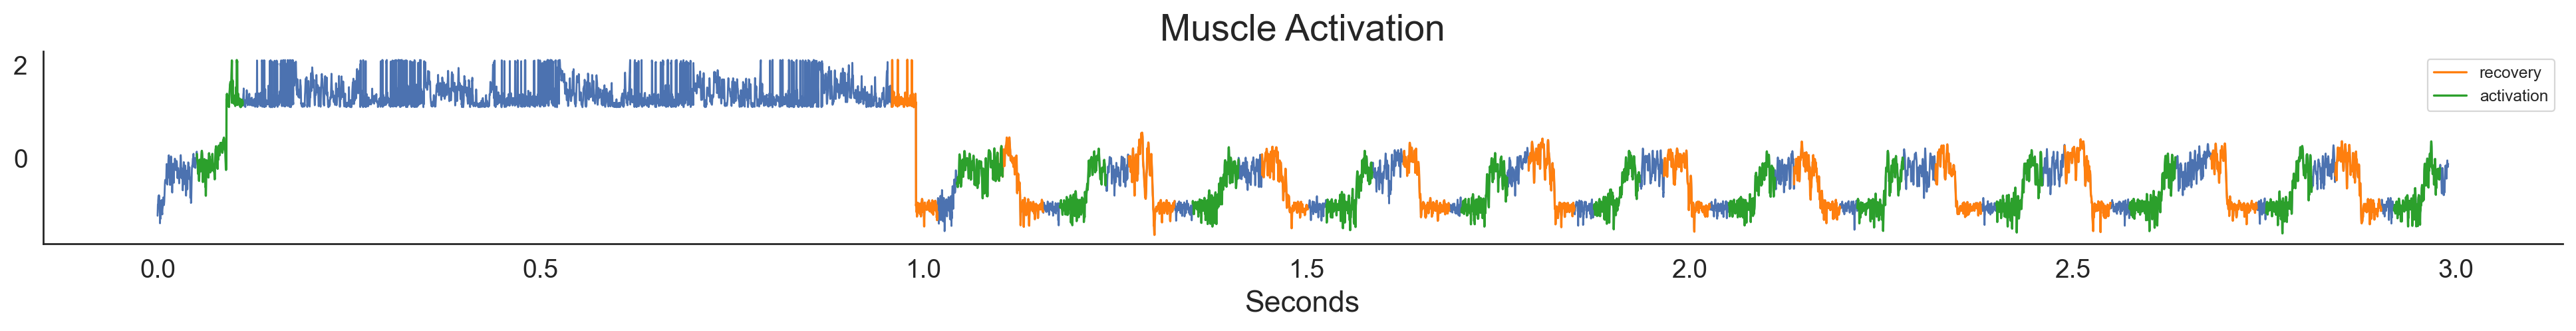

In [6]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"
series, df_gt = read_dataset_with_index(file) 

ml = Motiflets(ds_name, series, df_gt)
fig, ax = ml.plot_dataset()

# Known Motifs

The known motifs are the muscle movement activation and a recovery phase of the Gluteus Maximus muscle and have $13$ and $12$ occurrences, respectively.

## First, we learn the motif length l

We find a minimum around $l=0.8s$ to $l=1s$, equal to a heartbeat rate of $60$-$80$ bpm. 

	Time 84.8 s


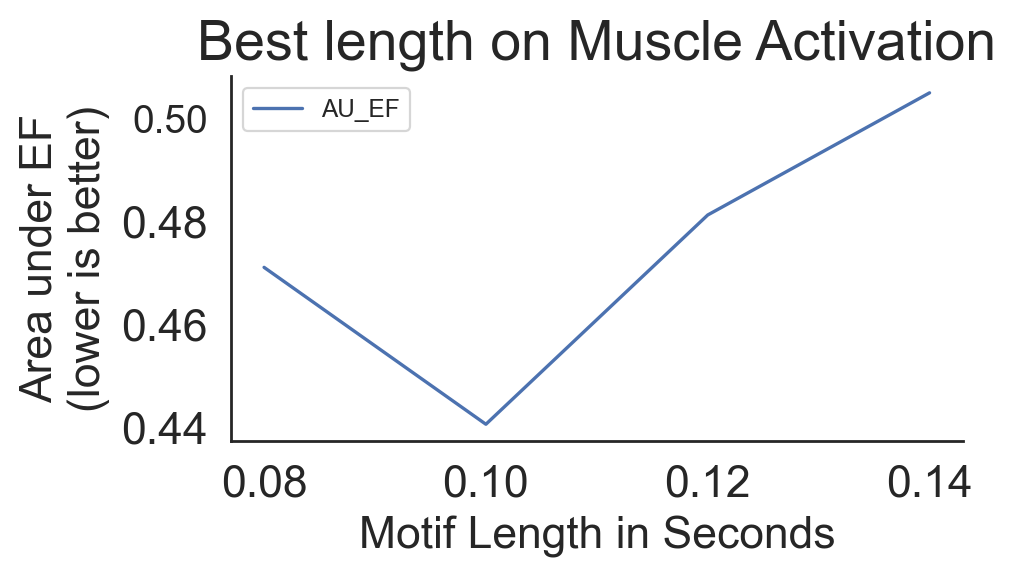

Found motif length 500


In [7]:
k = 13
length_range = np.arange(400,701,100) 

motif_length = ml.fit_motif_length(k, length_range)
print ("Found motif length", motif_length)

## Top-1 k-Motiflets

We find the recovery phase with $12$ occurences as TOP-1 motif

Data 14950
Chosen window-size: 500 in 19.9 s
Elbow Points [11]


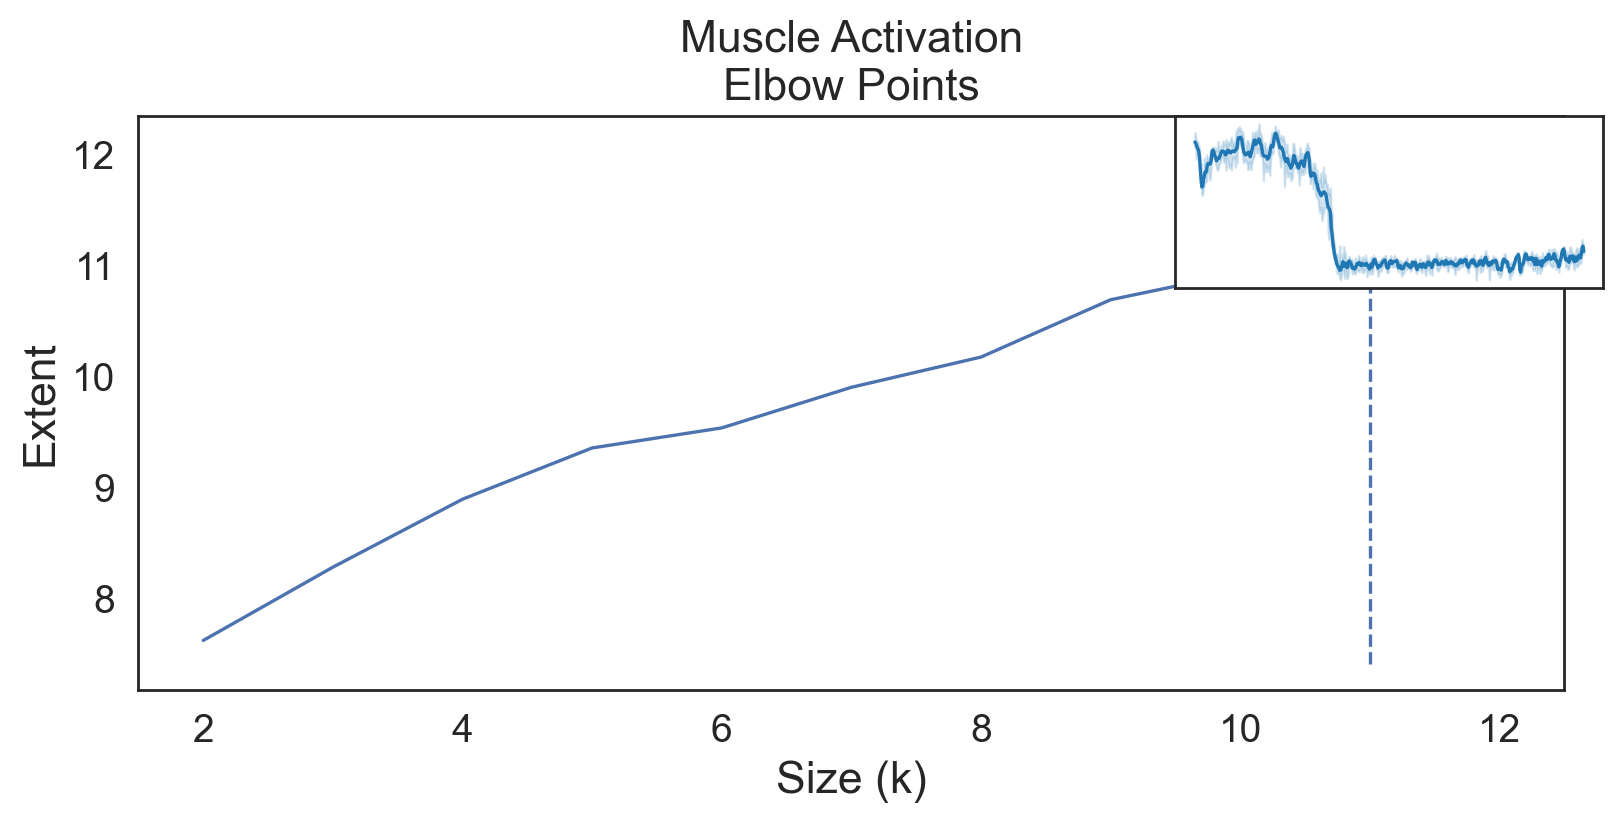

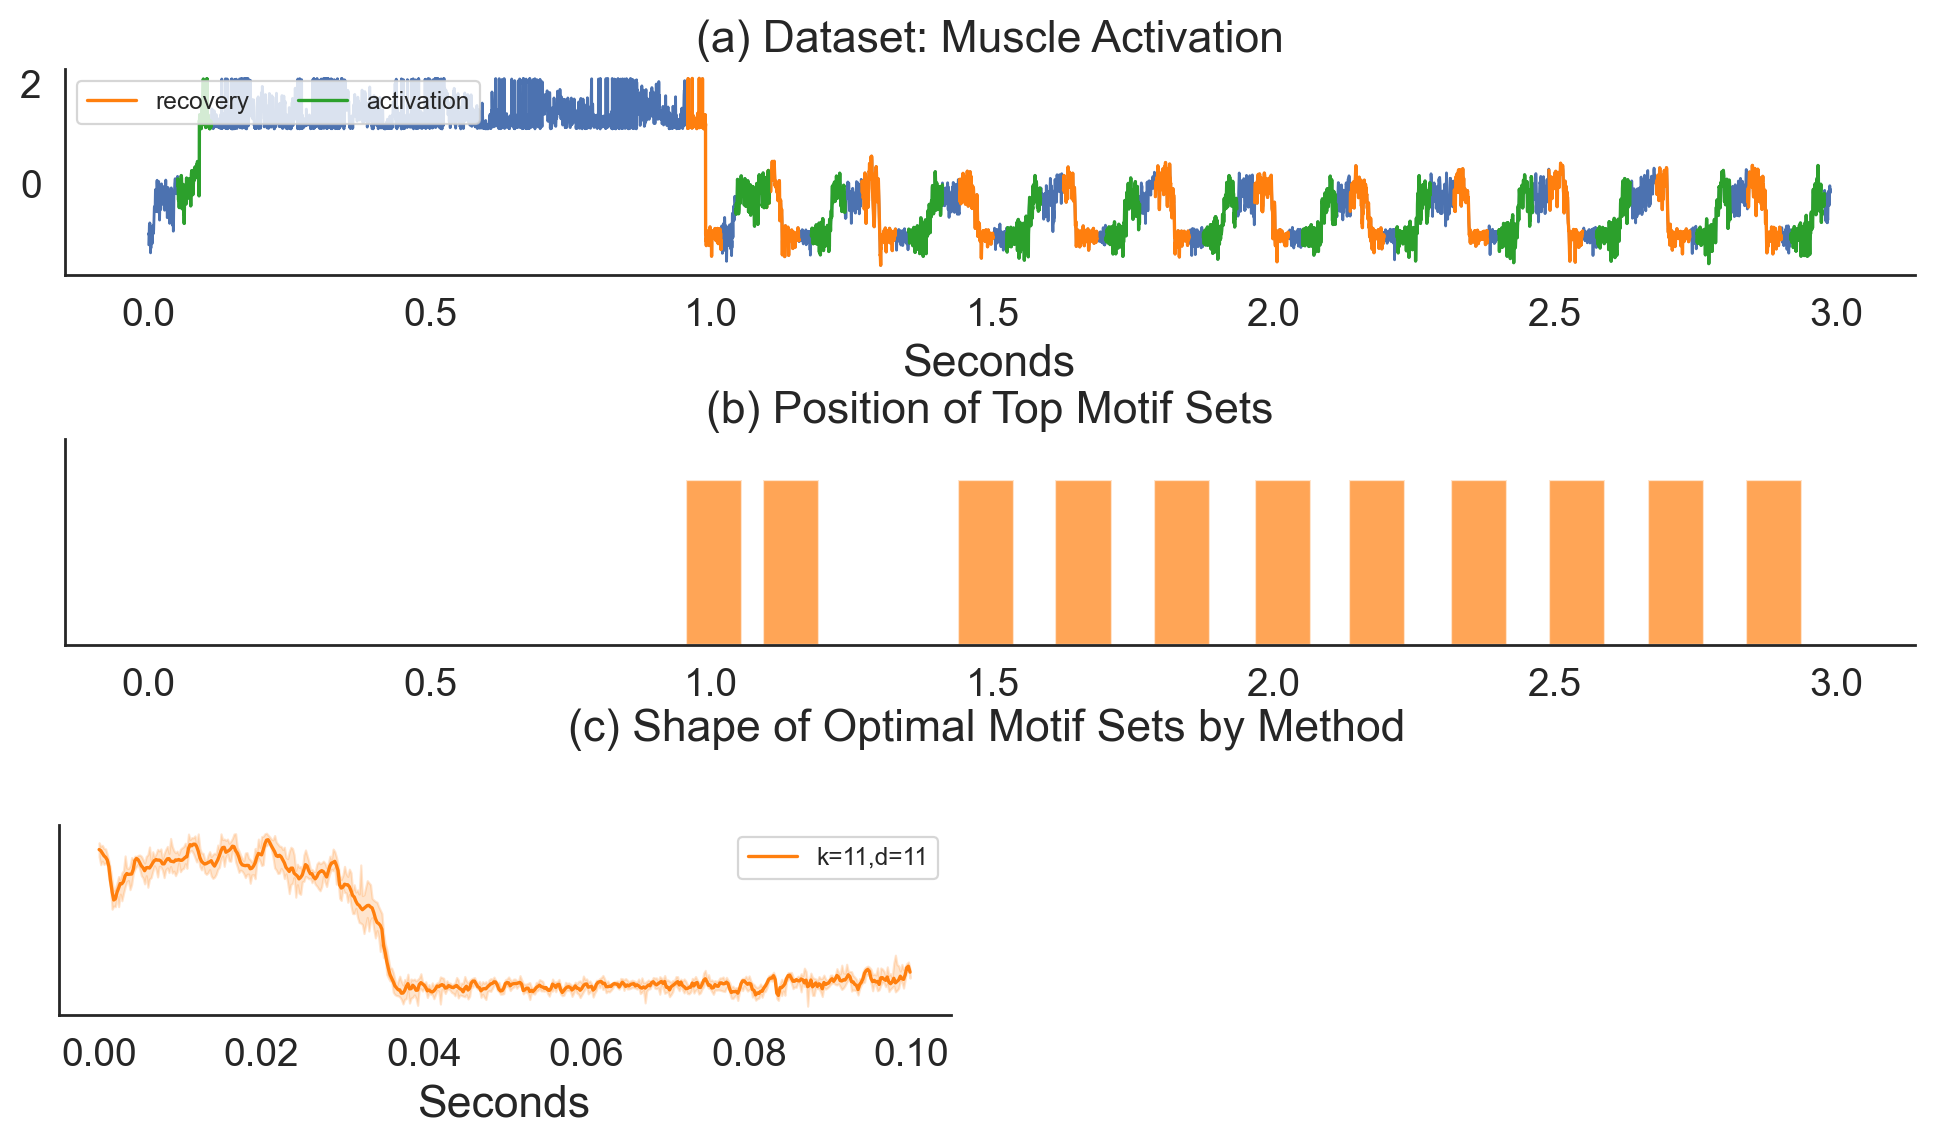

In [8]:
dists, candidates, elbow_points = ml.fit_k_elbow(k, motif_length)

<hr>

# Dataset: Physiodata - EEG sleep data
    
This Physiodata - EEG sleep dataset contains a recording of an afternoon nap of a healthy, nonsmoking person, between 20 to 40 years old. Data was recorded with an extrathoracic strain belt. The dataset consists of $269.286$ points at $100hz$ corresponding to $45min$. Known motifs are so-called sleep spindles and $k$-complexes.

### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


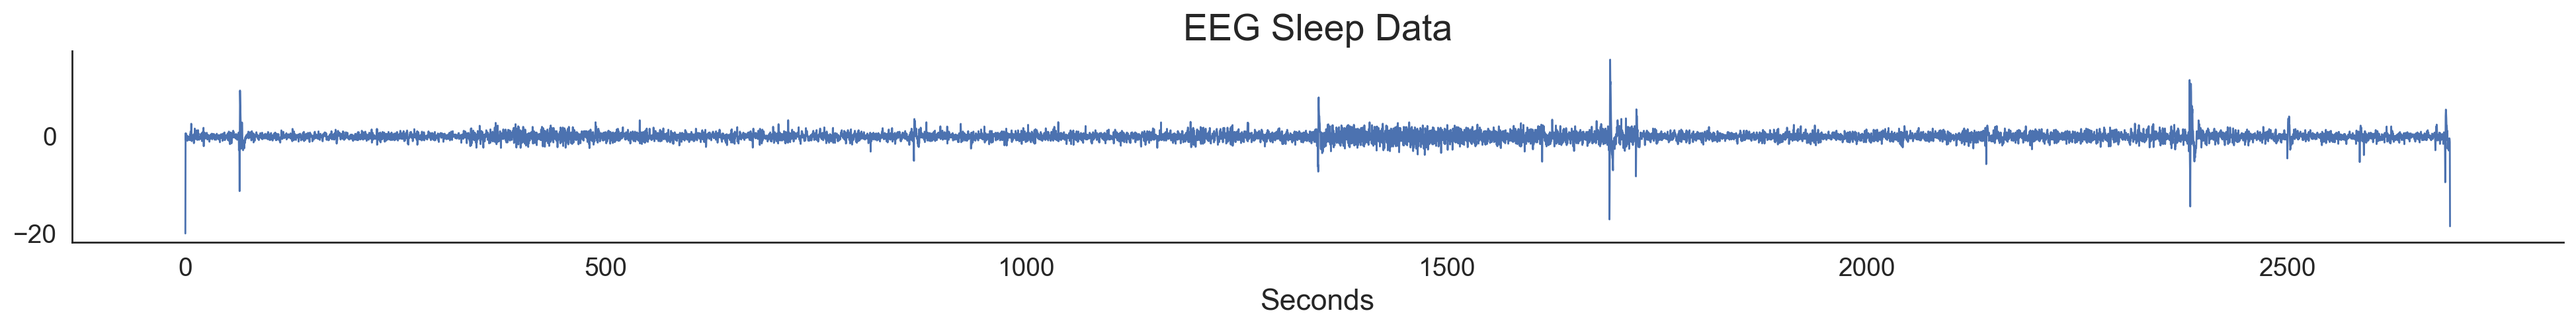

In [9]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series = read_dataset_with_index(file)

ml = Motiflets(ds_name, series)
fig, ax = ml.plot_dataset()

# Known Motifs in Stage 2 sleep phases


<img src="https://upload.wikimedia.org/wikipedia/commons/7/71/Stage2sleep_new.svg">

This data set contains two main motifs: the K-Complex and  sleep spindles, two characteristic markers of stage 2 sleep.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: calibration waves with $6$ repetitions and heartbeats with $16$ repetitions.

10214 145 20 2
motiflet: [246, 9167] extent=7.871332064319283
10214 145 20 3
motiflet: [110, 6375, 10197] extent=8.869173362397136
10214 145 20 4
motiflet: [110, 5042, 6375, 10197] extent=10.27013788908752
10214 145 20 5
motiflet: [162, 5095, 6428, 9084, 9528] extent=12.023409429983111
10214 145 20 6
motiflet: [109, 3193, 6375, 9031, 9475, 10197] extent=12.864086829677944
10214 145 20 7
motiflet: [110, 3194, 5042, 6375, 9475, 9807, 10197] extent=13.231619626634197
10214 145 20 8
motiflet: [227, 3311, 6493, 6613, 8215, 9148, 9593, 10065] extent=14.873521695187756
10214 145 20 9
motiflet: [234, 3318, 5168, 6192, 6500, 6621, 9156, 9600, 9950] extent=15.445881120900845
10214 145 20 10
motiflet: [2727, 3224, 5072, 6097, 6405, 8128, 9060, 9504, 9836, 9978] extent=16.000877531369202
10214 145 20 11
motiflet: [227, 1827, 2815, 3311, 6493, 6613, 8215, 9148, 9223, 9593, 10065] extent=16.37840206299806
10214 145 20 12
motiflet: [2731, 3229, 4496, 5077, 5761, 6411, 6531, 8132, 9067, 9512, 9861, 10

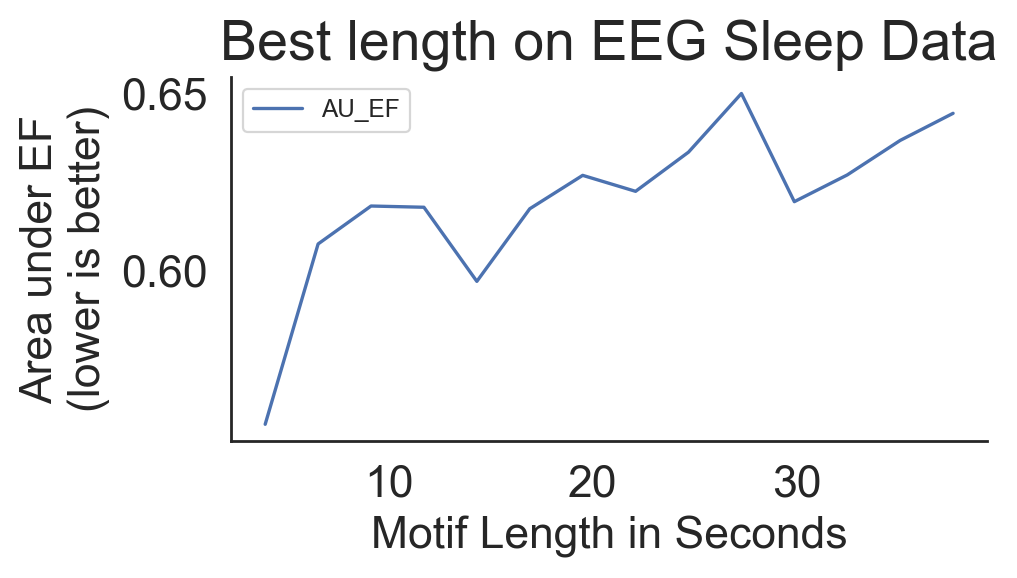

In [11]:
ks = 20
length_range = np.arange(15,151,10)
motif_length = ml.fit_motif_length(ks, length_range)

The dataset has many minima. We chose $l=25$ in the following, as it is a good value for both interesting motifs.

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

In the following plots, we found two characteristic motifs: 
sleep spindles with k=15 repetitions and K-komplexes with k=13 repetitions.

Data 10358
10334 25 20 2
motiflet: [6510, 10332] extent=1.9676793730413666
10334 25 20 3
motiflet: [6510, 6631, 10332] extent=2.5072344150340347
10334 25 20 4
motiflet: [5521, 5533, 5585, 5717] extent=2.9332183826223024
10334 25 20 5
motiflet: [5534, 5586, 5694, 5714, 5790] extent=3.793269288085405
10334 25 20 6
motiflet: [5515, 5531, 5579, 5695, 5715, 6068] extent=3.9556856414608887
10334 25 20 7
motiflet: [224, 6489, 8212, 9589, 9920, 10266, 10311] extent=4.120232730990029
10334 25 20 8
motiflet: [224, 6489, 8075, 8212, 9589, 9920, 10266, 10311] extent=4.519119185745288
10334 25 20 9
motiflet: [5358, 5373, 5412, 5744, 5778, 5830, 5866, 6333, 6988] extent=4.8715961137543955
10334 25 20 10
motiflet: [5328, 5353, 5422, 5437, 5452, 5487, 5548, 5974, 6110, 6347] extent=5.024517684408352
10334 25 20 11
motiflet: [5287, 5344, 5366, 5454, 5507, 5620, 5741, 5771, 5965, 6041, 6297] extent=5.203493437440243
10334 25 20 12
motiflet: [5347, 5373, 5431, 5510, 5578, 5590, 5690, 5778, 5866, 5890, 59

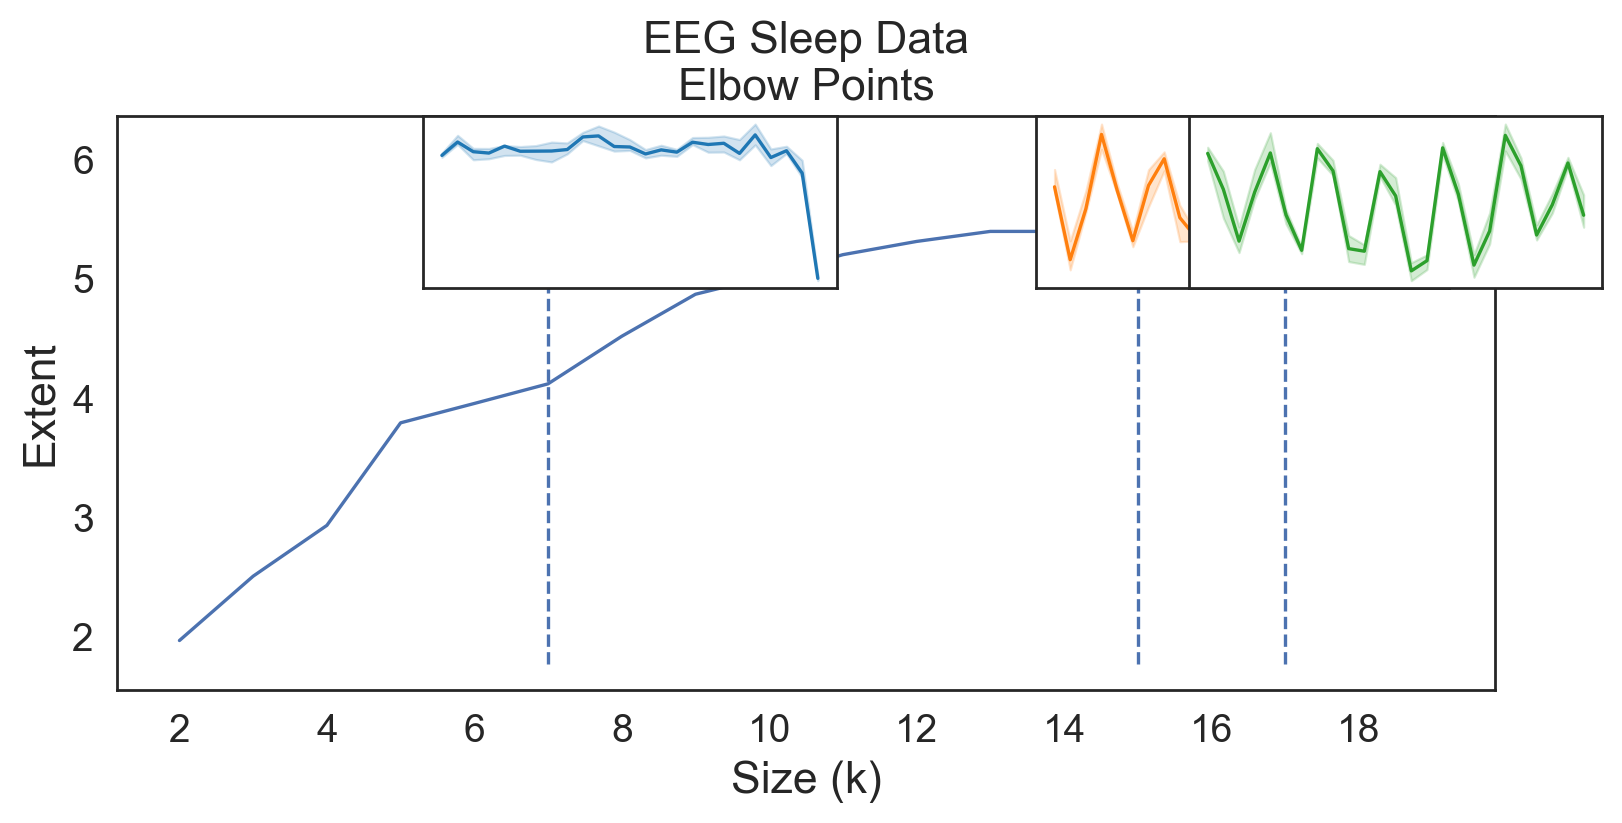

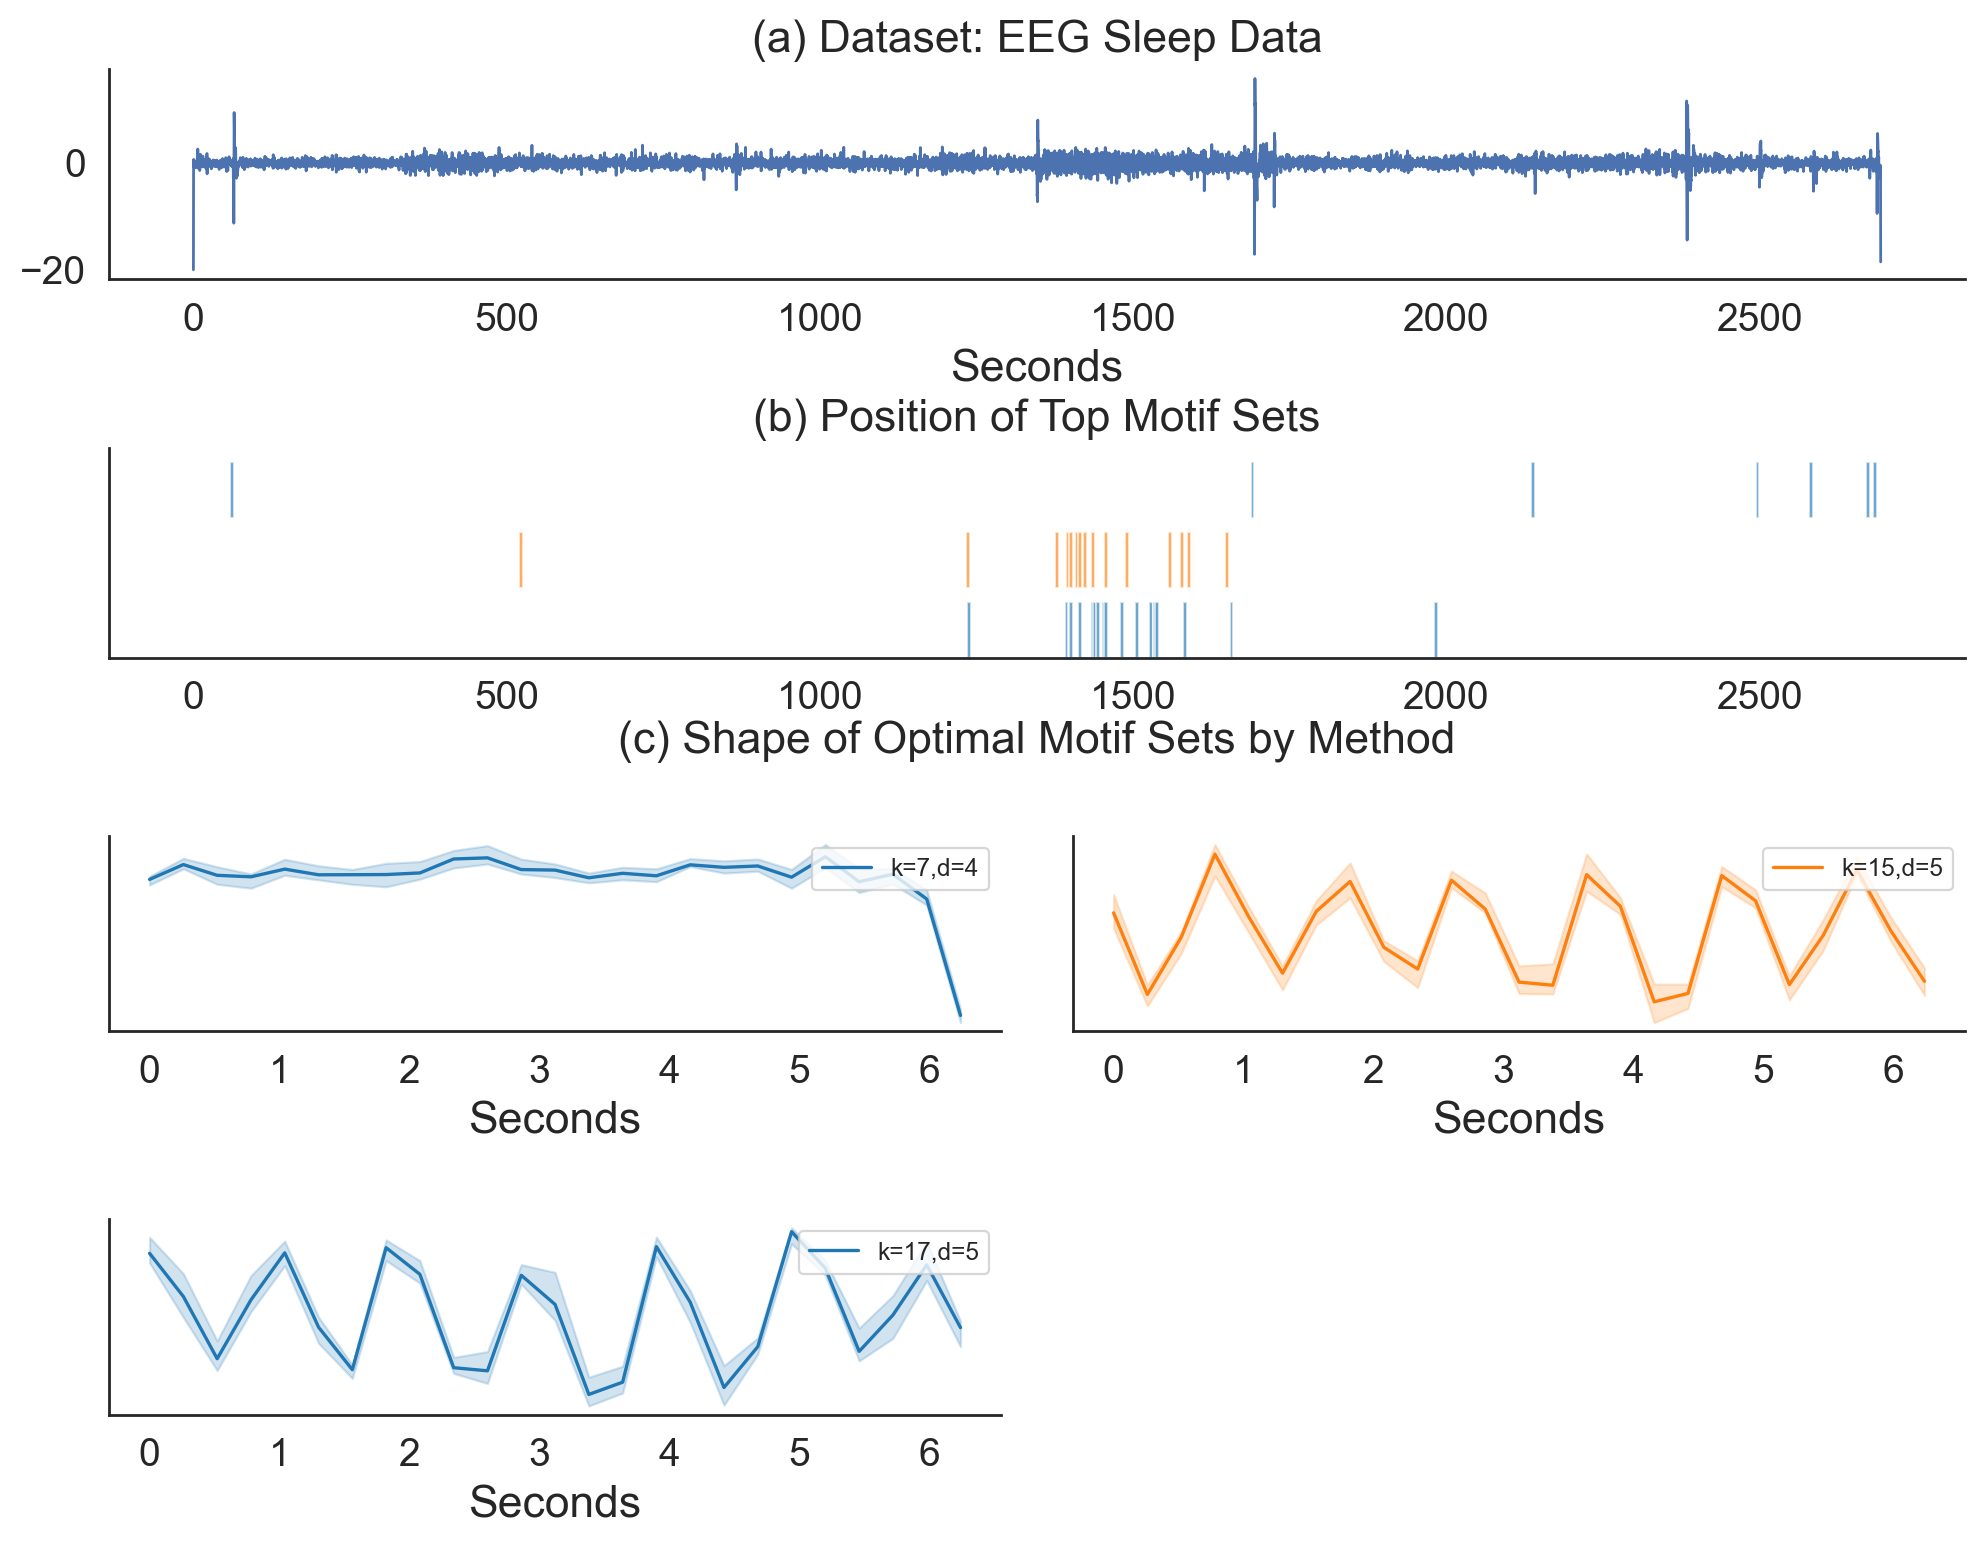

In [12]:
motif_length=25
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length)

<hr>

# Dataset: Winding

Industrial Winding Process is a snapshot of a process where a plastic web is unwound from a first reel (unwinding reel), goes over the second traction reel and is finally rewound on the the third rewinding reel. The recordings correspond to the traction of the second reel angular speed. The data contains $2.500$ points sampled at $0.1s$, corresponding to $250s$.

### References 
- [1] https://homes.esat.kuleuven.be/~tokka/daisydata.html
- [2] https://grammarviz2.github.io/grammarviz2_site/morea/motif/experience-m1.html

In [ ]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series = read_dataset_with_index(file)

ml = Motiflets(ds_name, series)
fig, ax = ml.plot_dataset()

# Known Motifs

 No documented motifs exist.

## First, we learn the motif length l

We find aminimum around $l=6s$, equal to 60 data points.

In [ ]:
ks = 12
length_range = np.arange(10,100,10)

motif_length = ml.fit_motif_length(ks, length_range)

# Top-1 Motiflets

In [ ]:
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length)

# Top-2 Motiflet

In [ ]:
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, exclusion=candidates)

<hr>

# Dataset: fNIRS Brain Imaging

Functional near-infrared spectroscopy (fNIRS) contains brain imaginary data recorded at $690nm$ intensity. There are $208.028$ measurements in total. The data is known to be a difficult example, as it contains four motion artifacts, due to movements of the patient, which dominate MD.

## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

In [ ]:
file = "fNIRS_subLen_600.csv" 
ds_name="fNIRS"
series = read_dataset_with_index(file) 

ml = Motiflets(ds_name, series)
fig, ax = ml.plot_dataset()

## Motif Length Selection

In [ ]:
ks = 20
length_range = np.arange(100,200,20)
motif_length = ml.fit_motif_length(ks, length_range)

print ("Found motif length", series.index[motif_length])

# Top k-Motiflets

In [ ]:
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, filter=True)